In [2]:
# the first thing is to import pandas and datatime
import pandas as pd
import datetime
from datetime import datetime
# we know that the lat long is north-west, turn them into floating pt values
def lat_lon_to_float(v):
    """
    convert strings from HNC to float locations
    
    """
#the following is the test for conversion of lat long     
    if(v[-1] =="S") or (v[-1] == "W"):
        multiplier = -1
    else:
        multiplier = 1
    return float(v[:-1])* multiplier
# so if there is an S or W it gets a negative in front
#now we have to read the data (text) into the machine
#1. create an empty list to hold the data that we want
data = []

#open the data in "r", read mode...with file handle f
# remember: .strip() removes the white space in the text. 

with open("hurdat2.txt","r") as f:
    for line in f.readlines():
        if line.startswith("AL"):
            storm_id = line.split(",")
            storm_number = storm_id[0].strip()
            storm_name = storm_id[1].strip()
        else:
            location_line = line.split(",")
            dt = datetime.strptime(location_line[0] + location_line[1], "%Y%m%d %H%M")
            storm_status = location_line[3].strip()
            #each of the lines below is a column in the table.
            storm_lat = lat_lon_to_float(location_line[4].strip())
            storm_lon = lat_lon_to_float(location_line[5].strip())
            max_speed = float(location_line[6].strip())
            #now after parsing we can append them to our data list
            data.append([storm_number, storm_name, storm_status, storm_lat, storm_lon, dt, max_speed])

In [3]:
# now make the dataframe
df = pd.DataFrame(data,columns=["Storm Number","Storm Name", "Storm Status", "Lat", "Lon", "Time", "Max Speed"])

In [4]:
df.head()

,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Max Speed
0,AL011851,UNNAMED,HU,28.0,-94.8,1851-06-25 00:00:00,80.0
1,AL011851,UNNAMED,HU,28.0,-95.4,1851-06-25 06:00:00,80.0
2,AL011851,UNNAMED,HU,28.0,-96.0,1851-06-25 12:00:00,80.0
3,AL011851,UNNAMED,HU,28.1,-96.5,1851-06-25 18:00:00,80.0
4,AL011851,UNNAMED,HU,28.2,-96.8,1851-06-25 21:00:00,80.0


In [5]:
df.tail()

,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Max Speed
51835,AL202019,SEBASTIEN,EX,52.2,-9.3,2019-11-26 12:00:00,45.0
51836,AL202019,SEBASTIEN,EX,52.2,-8.9,2019-11-26 18:00:00,40.0
51837,AL202019,SEBASTIEN,EX,51.8,-8.2,2019-11-27 00:00:00,40.0
51838,AL202019,SEBASTIEN,EX,51.4,-6.0,2019-11-27 06:00:00,40.0
51839,AL202019,SEBASTIEN,EX,51.3,-2.1,2019-11-27 12:00:00,40.0


In [6]:
len(df["Storm Number"].unique())

1893

In [7]:
df.groupby("Storm Status").count()

,Storm Number,Storm Name,Lat,Lon,Time,Max Speed
Storm Status,,,,,,
DB,153,153,153,153,153,153
EX,5436,5436,5436,5436,5436,5436
HU,15042,15042,15042,15042,15042,15042
LO,1256,1256,1256,1256,1256,1256
SD,305,305,305,305,305,305
SS,624,624,624,624,624,624
TD,10052,10052,10052,10052,10052,10052
TS,18834,18834,18834,18834,18834,18834
WV,138,138,138,138,138,138


/home/pchilton/anaconda3/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


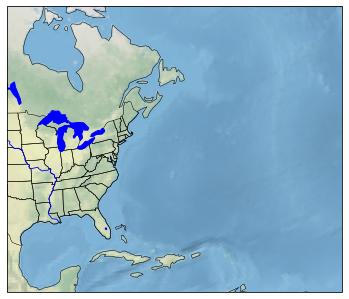

In [8]:
# now we need to plot this on the map that was previously created.
# this is where matplotlib will come in
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#MAGIC  - render the figure in the notebook.
%matplotlib inline
# set coordinate ref. systems
plot_crs =ccrs.LambertConformal(central_longitude = -100., central_latitude = 45)
data_crs =ccrs.PlateCarree()

#figures
fig = plt.figure(figsize = (6,6))

#axis
ax = plt.subplot(1,1,1, projection=plot_crs)
#left side,right side, bottom, top is the order below.
ax.set_extent([-100, -37, 18, 55], data_crs)


#background map
ax.stock_img()
ax.add_feature(cfeature.STATES, linewidth = 0.5)
ax.add_feature(cfeature.RIVERS, linewidth = 0.85, color = "b")
ax.add_feature(cfeature.COASTLINE, linewidth = 0.5)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, color = 'b')
for storm_status in df['Storm Status'] =="HU":
    storm_data = df[df["Storm Status"] == storm_status]
    ax.plot(storm_data["Lon"], storm_data["Lat"],transform = data_crs)

